Optimal wallet success 1st graph based on 1 credential = 98.70%
Optimal wallet success 2nd graph based on 1 credential = 71.45%


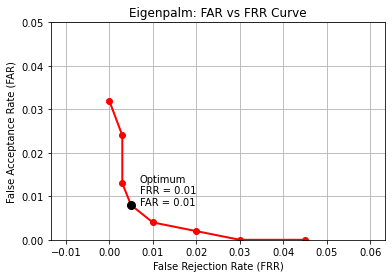

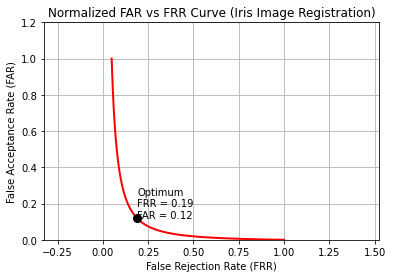

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# === 1st Credential - Eigenpalm ===
thresholds = np.arange(0.78, 0.94, 0.02)

FRR = np.array([0, 0.3, 0.3, 0.5, 1.0, 2.0, 3.0, 4.5]) / 100
FAR = np.array([3.2, 2.4, 1.3, 0.8, 0.4, 0.2, 0, 0]) / 100

cred1_FRR = FRR
cred1_FAR = FAR

opt_func1 = 1 - cred1_FAR * cred1_FRR - cred1_FAR * (1 - cred1_FRR) - cred1_FRR * (1 - cred1_FAR)
opt_idx1 = np.argmax(opt_func1)
opt_FRR1 = cred1_FRR[opt_idx1]
opt_FAR1 = cred1_FAR[opt_idx1]
opt_val1 = opt_func1[opt_idx1]

plt.figure()
plt.plot(cred1_FRR, cred1_FAR, 'r-o', linewidth=2, markerfacecolor='r')
plt.plot(opt_FRR1, opt_FAR1, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_FRR1 + 0.002, opt_FAR1, f'Optimum\nFRR = {opt_FRR1:.2f}\nFAR = {opt_FAR1:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Eigenpalm: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])
print(f'Optimal wallet success 1st graph based on 1 credential = {100 * opt_val1:.2f}%')

# === 2nd Credential - Iris ===
FAR_raw = np.logspace(-3, -1, 100)
cred2_FAR = (FAR_raw - np.min(FAR_raw)) / (np.max(FAR_raw) - np.min(FAR_raw))

FRR_raw = 4.0 * np.exp(-1.5 * np.log10(FAR_raw)) - 0.5
FRR_raw = np.maximum(FRR_raw, 0)
cred2_FRR = FRR_raw / np.max(FRR_raw)

opt_func2 = 1 - cred2_FAR * cred2_FRR - cred2_FAR * (1 - cred2_FRR) - cred2_FRR * (1 - cred2_FAR)
opt_idx2 = np.argmax(opt_func2)
opt_FRR2 = cred2_FRR[opt_idx2]
opt_FAR2 = cred2_FAR[opt_idx2]
opt_val2 = opt_func2[opt_idx2]

plt.figure()
plt.plot(cred2_FRR, cred2_FAR, 'r-', linewidth=2)
plt.plot(opt_FRR2, opt_FAR2, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_FRR2 + 0.002, opt_FAR2, f'Optimum\nFRR = {opt_FRR2:.2f}\nFAR = {opt_FAR2:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Normalized FAR vs FRR Curve (Iris Image Registration)')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 1.2])
plt.ylim([0, 1.2])
print(f'Optimal wallet success 2nd graph based on 1 credential = {100 * opt_val2:.2f}%')


In [6]:
def calculate_wallet_success(opt_FRR1,opt_FRR2,opt_FAR1,opt_FAR2):
    # Calculate individual risks for first credential
    leak_1 = opt_FAR1 * (1 - opt_FRR1)
    loss_1 = opt_FRR1 * (1 - opt_FAR1)
    theft_1 = opt_FRR1 * opt_FAR1
    safe_1 = 1 - leak_1 - loss_1 - theft_1

    # Calculate individual risks for second credential
    leak_2 = opt_FAR2 * (1 - opt_FRR2)
    loss_2 = opt_FRR2 * (1 - opt_FAR2)
    theft_2 = opt_FRR2 * opt_FAR2
    safe_2 = 1 - leak_2 - loss_2 - theft_2

    # OR Wallet logic
    OR_Wallet = safe_1 * safe_2 + loss_1 * safe_2 + loss_2 * safe_1

    # AND Wallet logic
    AND_Wallet = safe_1 * safe_2 + safe_1 * leak_2 + safe_2 * leak_1

    # Print results
    print(f'OR_Wallet   = {100 * OR_Wallet:.2f}%')
    print(f'AND_Wallet  = {100 * AND_Wallet:.2f}%\n')

In [7]:
calculate_wallet_success(opt_FRR1,opt_FRR2,opt_FAR1,opt_FAR2)

OR_Wallet   = 87.18%
AND_Wallet  = 80.74%



In [8]:
# === Fusion Wallets ===
loss1 = cred1_FRR * (1 - cred1_FAR)
leak1 = cred1_FAR * (1 - cred1_FRR)
theft1 = cred1_FRR * cred1_FAR
safe1 = 1 - loss1 - leak1 - theft1

loss2 = cred2_FRR * (1 - cred2_FAR)
leak2 = cred2_FAR * (1 - cred2_FRR)
theft2 = cred2_FRR * cred2_FAR
safe2 = 1 - loss2 - leak2 - theft2

Max OR_wallet = 98.7040%
Best for cred1: FRR = 0.01, FAR = 0.01
Best for cred2: FRR = 1.00, FAR = 0.00



(0.0, 1.0)

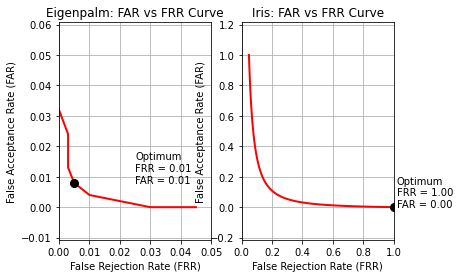

In [9]:
# --- OR Wallet ---
OR_wallet = np.zeros((len(safe1), len(safe2)))
for i in range(len(safe1)):
    for j in range(len(safe2)):
        s1, s2 = safe1[i], safe2[j]
        l1, l2 = loss1[i], loss2[j]
        OR_wallet[i, j] = s1 * s2 + s1 * l2 + s2 * l1

max_val_or = np.max(OR_wallet)
i_opt, j_opt = np.unravel_index(np.argmax(OR_wallet), OR_wallet.shape)
opt_OR_FRR1, opt_OR_FAR1 = cred1_FRR[i_opt], cred1_FAR[i_opt]
opt_OR_FRR2, opt_OR_FAR2 = cred2_FRR[j_opt], cred2_FAR[j_opt]

print(f'Max OR_wallet = {100 * max_val_or:.4f}%')
print(f'Best for cred1: FRR = {opt_OR_FRR1:.2f}, FAR = {opt_OR_FAR1:.2f}')
print(f'Best for cred2: FRR = {opt_OR_FRR2:.2f}, FAR = {opt_OR_FAR2:.2f}\n')

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(cred1_FRR, cred1_FAR, 'r-', linewidth=2)
plt.plot(opt_OR_FRR1, opt_OR_FAR1, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_OR_FRR1 + 0.02, opt_OR_FAR1, f'Optimum\nFRR = {opt_OR_FRR1:.2f}\nFAR = {opt_OR_FAR1:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Eigenpalm: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

plt.subplot(1, 2, 2)
plt.plot(cred2_FRR, cred2_FAR, 'r-', linewidth=2)
plt.plot(opt_OR_FRR2, opt_OR_FAR2, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_OR_FRR2 + 0.02, opt_OR_FAR2, f'Optimum\nFRR = {opt_OR_FRR2:.2f}\nFAR = {opt_OR_FAR2:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Iris: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])

Max AND_wallet = 93.9202%
Best for cred1: FRR = 0.01, FAR = 0.01
Best for cred2: FRR = 0.05, FAR = 1.00


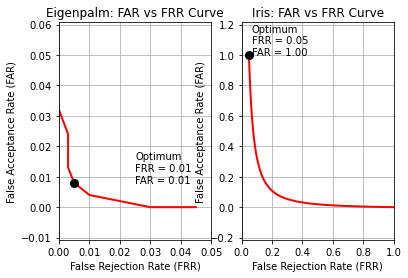

In [10]:
# --- AND Wallet ---
AND_wallet = np.zeros((len(safe1), len(safe2)))
for i in range(len(safe1)):
    for j in range(len(safe2)):
        s1, s2 = safe1[i], safe2[j]
        lk1, lk2 = leak1[i], leak2[j]
        AND_wallet[i, j] = s1 * s2 + s1 * lk2 + s2 * lk1

max_val_and = np.max(AND_wallet)
i_opt, j_opt = np.unravel_index(np.argmax(AND_wallet), AND_wallet.shape)
opt_AND_FRR1, opt_AND_FAR1 = cred1_FRR[i_opt], cred1_FAR[i_opt]
opt_AND_FRR2, opt_AND_FAR2 = cred2_FRR[j_opt], cred2_FAR[j_opt]

print(f'Max AND_wallet = {100 * max_val_and:.4f}%')
print(f'Best for cred1: FRR = {opt_AND_FRR1:.2f}, FAR = {opt_AND_FAR1:.2f}')
print(f'Best for cred2: FRR = {opt_AND_FRR2:.2f}, FAR = {opt_AND_FAR2:.2f}')

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(cred1_FRR, cred1_FAR, 'r-', linewidth=2)
plt.plot(opt_AND_FRR1, opt_AND_FAR1, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_AND_FRR1 + 0.02, opt_AND_FAR1, f'Optimum\nFRR = {opt_AND_FRR1:.2f}\nFAR = {opt_AND_FAR1:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Eigenpalm: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

plt.subplot(1, 2, 2)
plt.plot(cred2_FRR, cred2_FAR, 'r-', linewidth=2)
plt.plot(opt_AND_FRR2, opt_AND_FAR2, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_AND_FRR2 + 0.02, opt_AND_FAR2, f'Optimum\nFRR = {opt_AND_FRR2:.2f}\nFAR = {opt_AND_FAR2:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Iris: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

Same FRR/FAR values range

Optimal wallet success 1st graph based on 1 credential = 98.70%
Optimal wallet success 2nd graph based on 1 credential = 96.94%


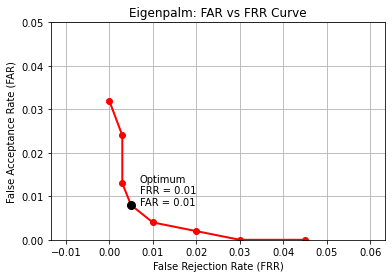

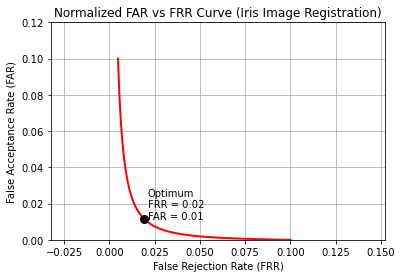

In [11]:
# === 1st Credential - Eigenpalm ===
thresholds = np.arange(0.78, 0.94, 0.02)

FRR = np.array([0, 0.3, 0.3, 0.5, 1.0, 2.0, 3.0, 4.5]) / 100
FAR = np.array([3.2, 2.4, 1.3, 0.8, 0.4, 0.2, 0, 0]) / 100

cred1_FRR = FRR
cred1_FAR = FAR

opt_func1 = 1 - cred1_FAR * cred1_FRR - cred1_FAR * (1 - cred1_FRR) - cred1_FRR * (1 - cred1_FAR)
opt_idx1 = np.argmax(opt_func1)
opt_FRR1 = cred1_FRR[opt_idx1]
opt_FAR1 = cred1_FAR[opt_idx1]
opt_val1 = opt_func1[opt_idx1]

plt.figure()
plt.plot(cred1_FRR, cred1_FAR, 'r-o', linewidth=2, markerfacecolor='r')
plt.plot(opt_FRR1, opt_FAR1, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_FRR1 + 0.002, opt_FAR1, f'Optimum\nFRR = {opt_FRR1:.2f}\nFAR = {opt_FAR1:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Eigenpalm: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])
print(f'Optimal wallet success 1st graph based on 1 credential = {100 * opt_val1:.2f}%')

# === 2nd Credential - Iris ===
FAR_raw = np.logspace(-3, -1, 100)
cred2_FAR = 0.1 * (FAR_raw - np.min(FAR_raw)) / (np.max(FAR_raw) - np.min(FAR_raw))

FRR_raw = 4.0 * np.exp(-1.5 * np.log10(FAR_raw)) - 0.5
FRR_raw = np.maximum(FRR_raw, 0)
cred2_FRR = 0.1 * FRR_raw / np.max(FRR_raw)

opt_func2 = 1 - cred2_FAR * cred2_FRR - cred2_FAR * (1 - cred2_FRR) - cred2_FRR * (1 - cred2_FAR)
opt_idx2 = np.argmax(opt_func2)
opt_FRR2 = cred2_FRR[opt_idx2]
opt_FAR2 = cred2_FAR[opt_idx2]
opt_val2 = opt_func2[opt_idx2]

plt.figure()
plt.plot(cred2_FRR, cred2_FAR, 'r-', linewidth=2)
plt.plot(opt_FRR2, opt_FAR2, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_FRR2 + 0.002, opt_FAR2, f'Optimum\nFRR = {opt_FRR2:.2f}\nFAR = {opt_FAR2:.2f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Normalized FAR vs FRR Curve (Iris Image Registration)')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.12])
plt.ylim([0, 0.12])
print(f'Optimal wallet success 2nd graph based on 1 credential = {100 * opt_val2:.2f}%')


In [12]:
calculate_wallet_success(opt_FRR1,opt_FRR2,opt_FAR1,opt_FAR2)

OR_Wallet   = 98.06%
AND_Wallet  = 97.57%



In [13]:
# === Fusion Wallets ===
loss1 = cred1_FRR * (1 - cred1_FAR)
leak1 = cred1_FAR * (1 - cred1_FRR)
theft1 = cred1_FRR * cred1_FAR
safe1 = 1 - loss1 - leak1 - theft1

loss2 = cred2_FRR * (1 - cred2_FAR)
leak2 = cred2_FAR * (1 - cred2_FRR)
theft2 = cred2_FRR * cred2_FAR
safe2 = 1 - loss2 - leak2 - theft2

Max OR_wallet = 99.7193%
Best for cred1: FRR = 0.0300, FAR = 0.0000
Best for cred2: FRR = 0.0761, FAR = 0.0005



(0.0, 0.12)

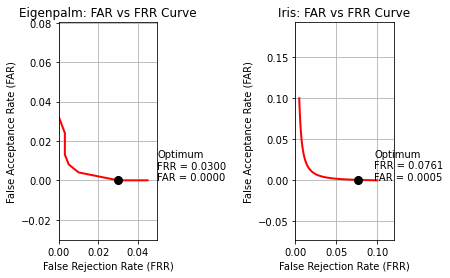

In [14]:
# --- OR Wallet ---
OR_wallet = np.zeros((len(safe1), len(safe2)))
for i in range(len(safe1)):
    for j in range(len(safe2)):
        s1, s2 = safe1[i], safe2[j]
        l1, l2 = loss1[i], loss2[j]
        OR_wallet[i, j] = s1 * s2 + s1 * l2 + s2 * l1

max_val_or = np.max(OR_wallet)
i_opt, j_opt = np.unravel_index(np.argmax(OR_wallet), OR_wallet.shape)
opt_OR_FRR1, opt_OR_FAR1 = cred1_FRR[i_opt], cred1_FAR[i_opt]
opt_OR_FRR2, opt_OR_FAR2 = cred2_FRR[j_opt], cred2_FAR[j_opt]

print(f'Max OR_wallet = {100 * max_val_or:.4f}%')
print(f'Best for cred1: FRR = {opt_OR_FRR1:.4f}, FAR = {opt_OR_FAR1:.4f}')
print(f'Best for cred2: FRR = {opt_OR_FRR2:.4f}, FAR = {opt_OR_FAR2:.4f}\n')

plt.figure()
plt.subplot(1, 3, 1)
plt.plot(cred1_FRR, cred1_FAR, 'r-', linewidth=2)
plt.plot(opt_OR_FRR1, opt_OR_FAR1, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_OR_FRR1 + 0.02, opt_OR_FAR1, f'Optimum\nFRR = {opt_OR_FRR1:.4f}\nFAR = {opt_OR_FAR1:.4f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Eigenpalm: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.05])
plt.ylim([0, 0.05])

plt.subplot(1, 3, 3)
plt.plot(cred2_FRR, cred2_FAR, 'r-', linewidth=2)
plt.plot(opt_OR_FRR2, opt_OR_FAR2, 'ko', markersize=8, markerfacecolor='k')
plt.text(opt_OR_FRR2 + 0.02, opt_OR_FAR2, f'Optimum\nFRR = {opt_OR_FRR2:.4f}\nFAR = {opt_OR_FAR2:.4f}', fontsize=10)
plt.xlabel('False Rejection Rate (FRR)')
plt.ylabel('False Acceptance Rate (FAR)')
plt.title('Iris: FAR vs FRR Curve')
plt.grid(True)
plt.axis('equal')
plt.xlim([0, 0.12])
plt.ylim([0, 0.12])

Generating Different distribution functions to find optimal credentials type

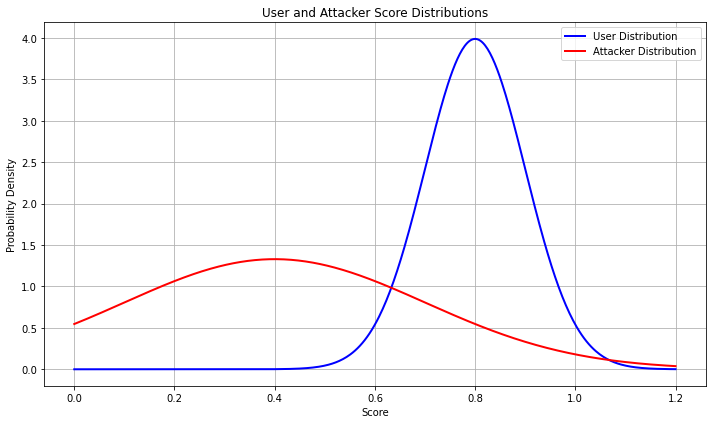

In [15]:
from scipy.stats import norm

# Parameters for user and attacker distributions
mu_user, sigma_user = 0.8, 0.1
mu_attacker, sigma_attacker = 0.4, 0.3

# Range of threshold values
T = np.linspace(0, 1.2, 500)

# Compute FRR and FAR as functions of threshold
FRR = norm.cdf(T, loc=mu_user, scale=sigma_user)        # FRR(T) = P(user score < T)
FAR = 1 - norm.cdf(T, loc=mu_attacker, scale=sigma_attacker)  # FAR(T) = P(attacker score > T)

# Compute PDFs
pdf_user = norm.pdf(T, mu_user, sigma_user)
pdf_attacker = norm.pdf(T, mu_attacker, sigma_attacker)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.plot(T, pdf_user, label='User Distribution', color='blue', linewidth=2)
plt.plot(T, pdf_attacker, label='Attacker Distribution', color='red', linewidth=2)

# Axis labels and legend
plt.title('User and Attacker Score Distributions')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


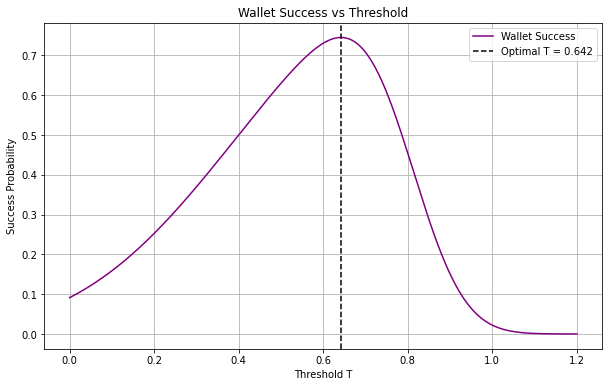

Optimal Threshold (max success): T = 0.6421, Success = 74.4994%


In [16]:
wallet_success = 1 - FAR - FRR + FAR * FRR

# Find threshold that maximizes success
success_idx = np.argmax(wallet_success)
success_threshold = T[success_idx]
max_success = wallet_success[success_idx]

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(T, wallet_success, label='Wallet Success', color='purple')
plt.axvline(success_threshold, linestyle='--', color='black', label=f'Optimal T = {success_threshold:.3f}')
plt.xlabel('Threshold T')
plt.ylabel('Success Probability')
plt.title('Wallet Success vs Threshold')
plt.grid(True)
plt.legend()
plt.show()

# Output result
print(f"Optimal Threshold (max success): T = {success_threshold:.4f}, Success = {max_success:.4%}")

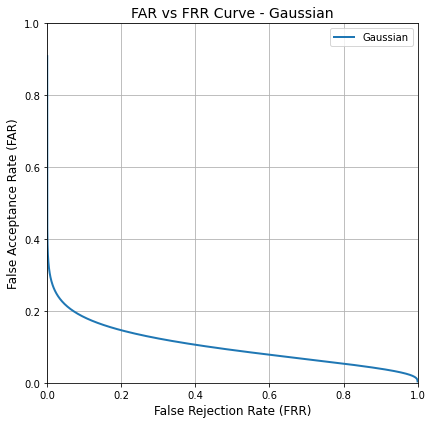

In [17]:
# Plot FAR vs FRR curve
plt.figure(figsize=(6, 6))
plt.plot(FRR, FAR, label=f"Gaussian", linewidth=2)
plt.xlabel("False Rejection Rate (FRR)", fontsize=12)
plt.ylabel("False Acceptance Rate (FAR)", fontsize=12)
plt.title(f"FAR vs FRR Curve - Gaussian", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [18]:
loss1 = FRR * (1 - FAR)
leak1 = FAR * (1 - FRR)
theft1 = FRR * FAR
safe1 = 1 - loss1 - leak1 - theft1

loss2 = FRR * (1 - FAR)
leak2 = FAR * (1 - FRR)
theft2 = FRR * FAR
safe2 = 1 - loss2 - leak2 - theft2

AND_wallet = np.zeros((len(safe1), len(safe2)))
for i in range(len(safe1)):
    for j in range(len(safe2)):
        s1, s2 = safe1[i], safe2[j]
        lk1, lk2 = leak1[i], leak2[j]
        AND_wallet[i, j] = s1 * s2 + s1 * lk2 + s2 * lk1

max_val_and = np.max(AND_wallet)
i_opt, j_opt = np.unravel_index(np.argmax(AND_wallet), AND_wallet.shape)
opt_AND_FRR1, opt_AND_FAR1 = FRR[i_opt], FAR[i_opt]
opt_AND_FRR2, opt_AND_FAR2 = FRR[j_opt], FAR[j_opt]

print(f'Max AND_wallet = {100 * max_val_and:.4f}%')
print(f'Best for cred1: FRR = {opt_AND_FRR1:.2f}, FAR = {opt_AND_FAR1:.2f}')
print(f'Best for cred2: FRR = {opt_AND_FRR2:.2f}, FAR = {opt_AND_FAR2:.2f}')

Max AND_wallet = 89.9330%
Best for cred1: FRR = 0.01, FAR = 0.28
Best for cred2: FRR = 0.01, FAR = 0.28


In [19]:
def parabola_pdf(t, center, width):
    """Simple parabola-shaped PDF: inverted quadratic centered at `center` with width."""
    y = -((t - center) / width)**2 + 1
    y = np.clip(y, 0, None)  # clip negative values to 0
    y /= np.trapz(y, t)      # normalize
    return y

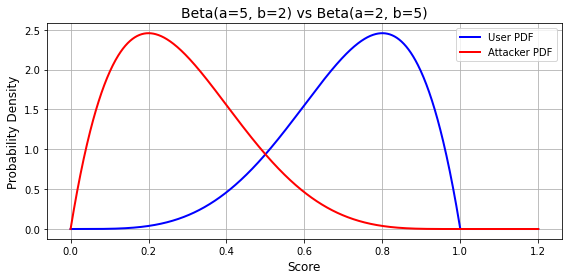

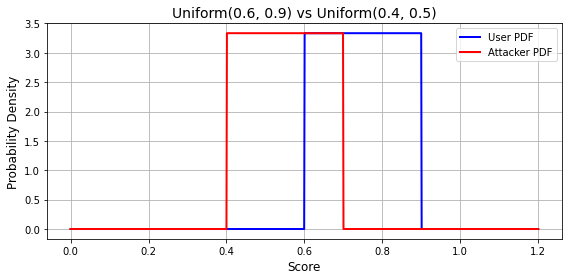

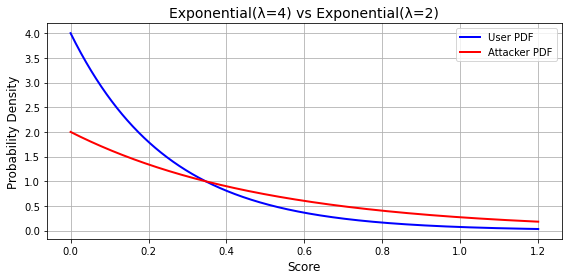

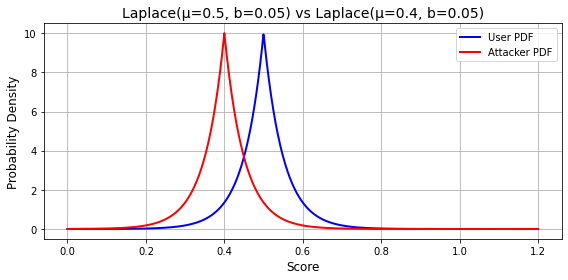

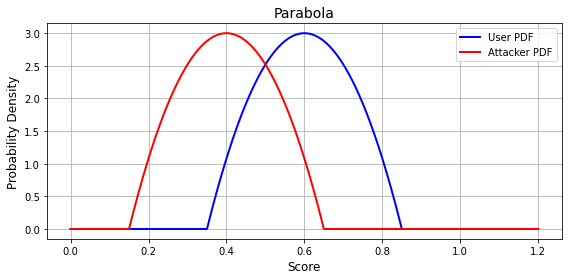

In [20]:
from scipy.stats import beta, uniform, expon, laplace
# Define score axis
t = np.linspace(0, 1.2, 1000)

# Define user and attacker PDFs for each distribution type
distribution_pairs = {
    "Beta(a=5, b=2) vs Beta(a=2, b=5)": (
        beta.pdf(t, a=5, b=2),   # User
        beta.pdf(t, a=2, b=5)    # Attacker
    ),
    "Uniform(0.6, 0.9) vs Uniform(0.4, 0.5)": (
        uniform.pdf(t, loc=0.6, scale=0.3),   # User
        uniform.pdf(t, loc=0.4, scale=0.3)    # Attacker
    ),
    "Exponential(λ=4) vs Exponential(λ=2)": (
        expon.pdf(t, scale=1/4),  # User
        expon.pdf(t, scale=1/2)   # Attacker
    ),
    "Laplace(μ=0.5, b=0.05) vs Laplace(μ=0.4, b=0.05)": (
        laplace.pdf(t, loc=0.5, scale=0.05),  # User
        laplace.pdf(t, loc=0.4, scale=0.05)   # Attacker
    ),
    "Parabola": (
        parabola_pdf(t, center=0.6, width=0.25),
        parabola_pdf(t, center=0.4, width=0.25)
    )
}

# Plot each pair on its own graph
for title, (user_pdf, attacker_pdf) in distribution_pairs.items():
    plt.figure(figsize=(8, 4))
    plt.plot(t, user_pdf, label='User PDF', color='blue', linewidth=2)
    plt.plot(t, attacker_pdf, label='Attacker PDF', color='red', linewidth=2)
    plt.title(title, fontsize=14)
    plt.xlabel("Score", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

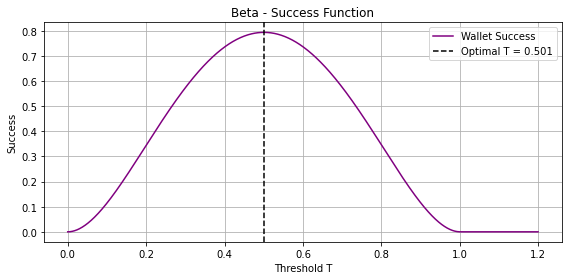

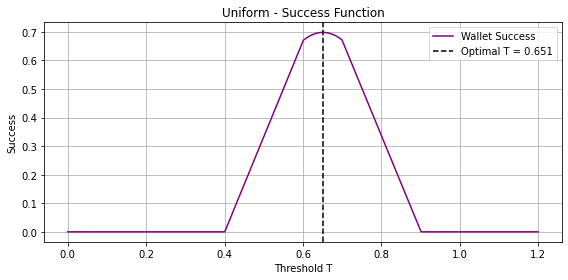

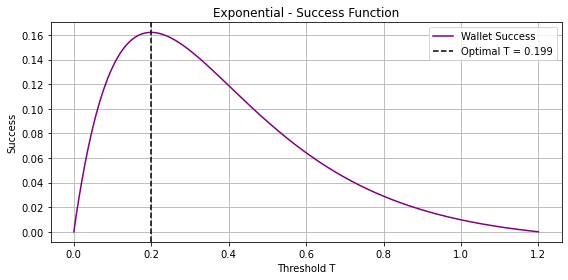

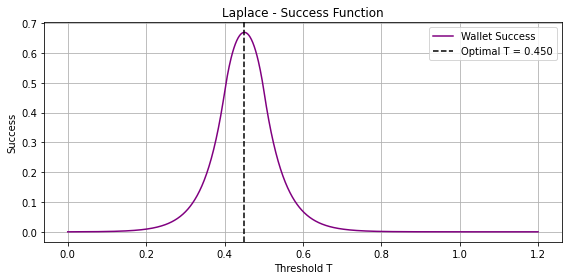

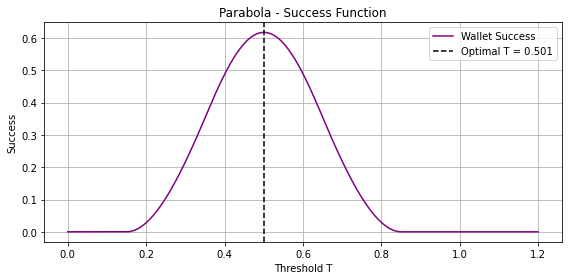

Credential    Max Success  Optimal Threshold
Beta                79.42%             0.5009
Uniform             69.83%             0.6511
Exponential         16.20%             0.1994
Laplace             66.95%             0.4505
Parabola            61.70%             0.5009


In [21]:
dt = t[1] - t[0]

# Define user and attacker PDFs for each distribution type
distribution_pairs = {
    "Beta": (
        beta.pdf(t, a=5, b=2),   # User
        beta.pdf(t, a=2, b=5)    # Attacker
    ),
    "Uniform": (
        uniform.pdf(t, loc=0.6, scale=0.3),   # User
        uniform.pdf(t, loc=0.4, scale=0.3)    # Attacker
    ),
    "Exponential": (
        expon.pdf(t, scale=1/4),  # User
        expon.pdf(t, scale=1/2)   # Attacker
    ),
    "Laplace": (
        laplace.pdf(t, loc=0.5, scale=0.05),  # User
        laplace.pdf(t, loc=0.4, scale=0.05)   # Attacker
    ),
    "Parabola": (
        parabola_pdf(t, center=0.6, width=0.25),
        parabola_pdf(t, center=0.4, width=0.25)
    )
}

# Store results
results = []

# Loop through each distribution pair
for name, (user_pdf, attacker_pdf) in distribution_pairs.items():
    # Normalize
    user_pdf /= np.trapz(user_pdf, t)
    attacker_pdf /= np.trapz(attacker_pdf, t)

    FAR = []
    FRR = []
    Success = []

    for T in t:
        frr = np.trapz(user_pdf[t < T], t[t < T])
        far = np.trapz(attacker_pdf[t >= T], t[t >= T])
        success = 1 - far - frr + far * frr

        FAR.append(far)
        FRR.append(frr)
        Success.append(success)

    FAR = np.array(FAR)
    FRR = np.array(FRR)
    Success = np.array(Success)

    max_idx = np.argmax(Success)
    best_T = t[max_idx]
    best_success = Success[max_idx] * 100

    results.append((name, best_success, best_T))

    # Optional: Plot the success curve
    plt.figure(figsize=(8, 4))
    plt.plot(t, Success, label="Wallet Success", color="purple")
    plt.axvline(best_T, color="black", linestyle="--", label=f"Optimal T = {best_T:.3f}")
    plt.title(f"{name} - Success Function")
    plt.xlabel("Threshold T")
    plt.ylabel("Success")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Print results
print(f"{'Credential':<12} {'Max Success':>12} {'Optimal Threshold':>18}")
for name, success, T in results:
    print(f"{name:<12} {success:12.2f}% {T:18.4f}")


FAR vs FRR curves

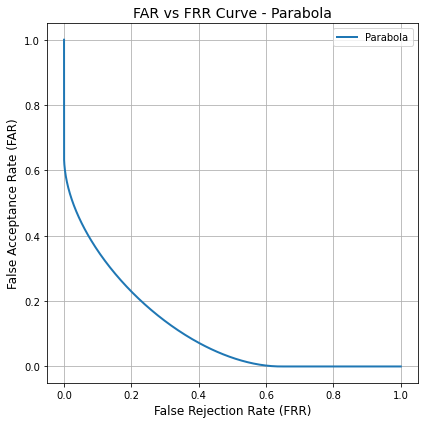

In [22]:
    # Plot FAR vs FRR curve
    plt.figure(figsize=(6, 6))
    plt.plot(FRR, FAR, label=f"{name}", linewidth=2)
    plt.xlabel("False Rejection Rate (FRR)", fontsize=12)
    plt.ylabel("False Acceptance Rate (FAR)", fontsize=12)
    plt.title(f"FAR vs FRR Curve - {name}", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Combining credentials types

In [23]:
import itertools

# Precompute metrics per distribution
cred_results = {}

for name, (user_pdf, attacker_pdf) in distribution_pairs.items():
    user_pdf /= np.trapz(user_pdf, t)
    attacker_pdf /= np.trapz(attacker_pdf, t)

    FRR = np.array([np.trapz(user_pdf[t < T], t[t < T]) for T in t])
    FAR = np.array([np.trapz(attacker_pdf[t >= T], t[t >= T]) for T in t])

    loss = FRR * (1 - FAR)
    leak = FAR * (1 - FRR)
    theft = FRR * FAR
    safe = 1 - loss - leak - theft

    best_idx = np.argmax(safe)

    cred_results[name] = {
        "FRR": FRR,
        "FAR": FAR,
        "safe": safe,
        "loss": loss,
        "leak": leak,
        "best_index": best_idx,
        "threshold": t[best_idx]
    }

# Evaluate combined wallet success at standalone safe thresholds
results = []

for (name1, r1), (name2, r2) in itertools.combinations(cred_results.items(), 2):
    i = r1["best_index"]
    j = r2["best_index"]

    s1, s2 = r1["safe"][i], r2["safe"][j]
    l1, l2 = r1["loss"][i], r2["loss"][j]
    k1, k2 = r1["leak"][i], r2["leak"][j]
    
    far1, frr1 = r1["FAR"][i], r1["FRR"][i]
    far2, frr2 = r2["FAR"][j], r2["FRR"][j]
    
    wallet1_success = s1 * s2 + s1 * l2 + s2 * l1
    wallet2_success = s1 * s2 + s1 * k2 + s2 * k1

    results.append((f"{name1} + {name2}", wallet1_success * 100, wallet2_success * 100,
                    t[i], t[j], far1, frr1, far2, frr2))
    
# Print results
print("Evaluation of 2 wallets based on each one optimal point")
print(f"{'Pair':<25} {'Wallet1 (%)':>12} {'Wallet2 (%)':>12} {'T1':>8} {'T2':>8} {'FAR1':>8} {'FRR1':>8} {'FAR2':>8} {'FRR2':>8}")
for name, w1, w2, T1, T2, far1, frr1, far2, frr2 in results:
    print(f"{name:<25} {w1:12.2f} {w2:12.2f} {T1:8.3f} {T2:8.3f} {far1:8.3f} {frr1:8.3f} {far2:8.3f} {frr2:8.3f}")


Evaluation of 2 wallets based on each one optimal point
Pair                       Wallet1 (%)  Wallet2 (%)       T1       T2     FAR1     FRR1     FAR2     FRR2
Beta + Uniform                   73.30        72.99    0.501    0.651    0.109    0.109    0.163    0.166
Beta + Exponential               30.30        37.15    0.501    0.199    0.109    0.109    0.638    0.552
Beta + Laplace                   71.45        71.50    0.501    0.450    0.109    0.109    0.182    0.181
Beta + Parabola                  68.45        68.29    0.501    0.501    0.109    0.109    0.214    0.215
Uniform + Exponential            27.51        33.49    0.651    0.199    0.163    0.166    0.638    0.552
Uniform + Laplace                66.41        66.26    0.651    0.450    0.163    0.166    0.182    0.181
Uniform + Parabola               63.49        63.17    0.651    0.501    0.163    0.166    0.214    0.215
Exponential + Laplace            26.62        32.42    0.199    0.450    0.638    0.552    0.182

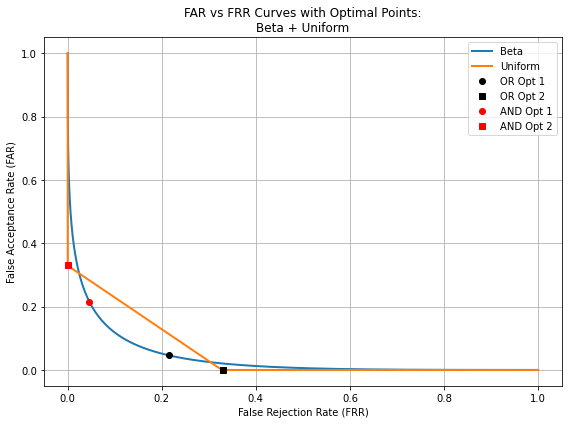

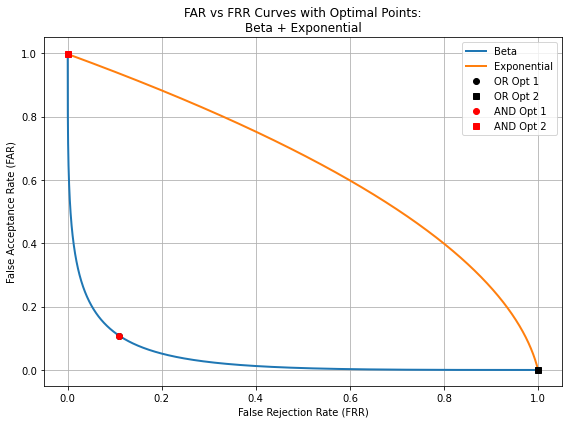

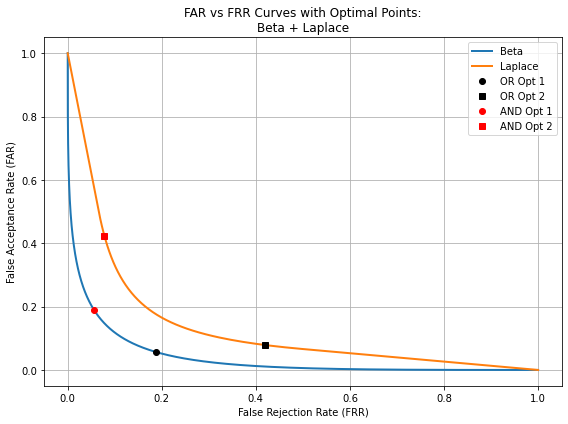

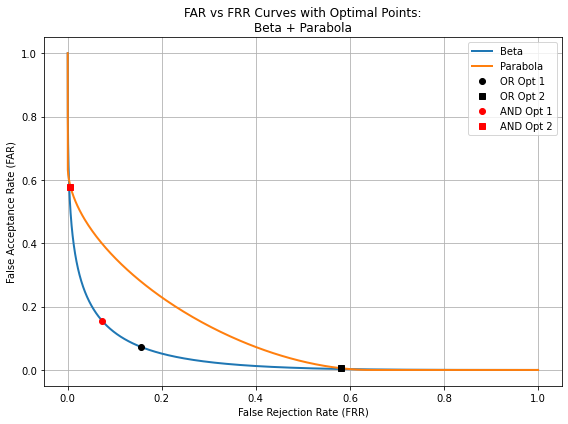

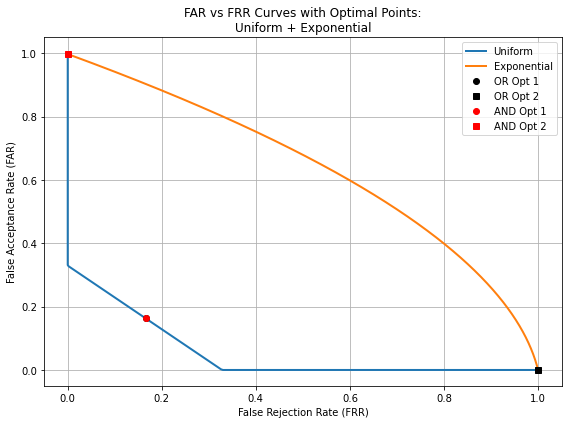

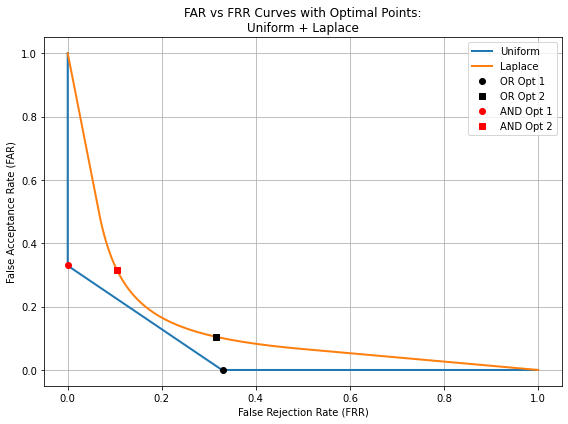

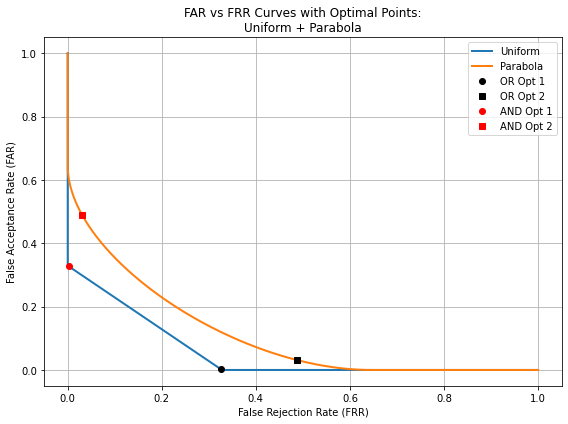

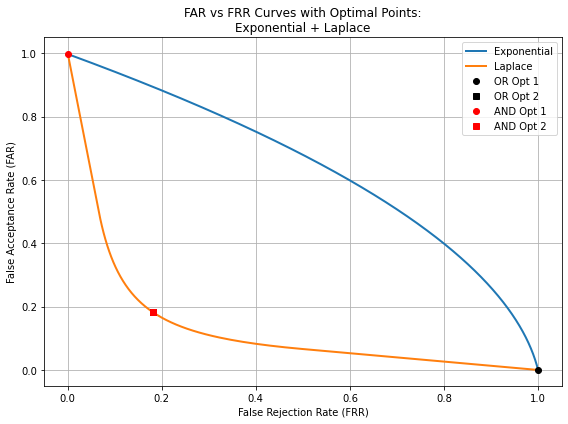

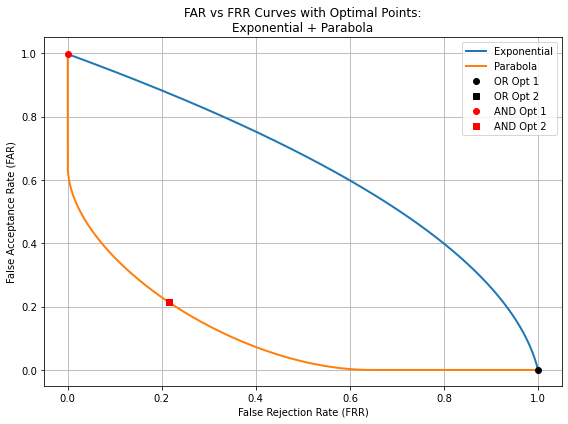

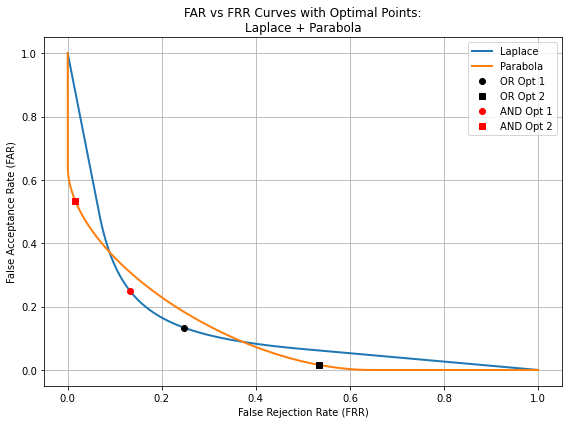


Wallet 1 (OR Wallet):
Pair                         Max Success (%)         T1         T2     FAR1     FRR1     FAR2     FRR2
Beta + Uniform                         88.61      0.590      0.700    0.000    0.046    0.330    0.216
Beta + Exponential                     79.42      0.501      1.200    0.000    0.109    1.000    0.109
Beta + Laplace                         80.06      0.571      0.492    0.079    0.056    0.420    0.189
Beta + Parabola                        83.87      0.544      0.628    0.006    0.073    0.581    0.155
Uniform + Exponential                  69.84      0.651      1.200    0.000    0.163    1.000    0.166
Uniform + Laplace                      80.21      0.700      0.478    0.105    0.000    0.315    0.330
Uniform + Parabola                     81.31      0.699      0.597    0.031    0.002    0.487    0.326
Exponential + Laplace                  66.95      1.200      0.450    0.182    0.000    0.181    1.000
Exponential + Parabola                 61.70      

In [24]:
# Precompute metrics
cred_results = {}
for name, (user_pdf, attacker_pdf) in distribution_pairs.items():
    user_pdf /= np.trapz(user_pdf, t)
    attacker_pdf /= np.trapz(attacker_pdf, t)

    FRR = np.array([np.trapz(user_pdf[t < T], t[t < T]) for T in t])
    FAR = np.array([np.trapz(attacker_pdf[t >= T], t[t >= T]) for T in t])
    loss = FRR * (1 - FAR)
    leak = FAR * (1 - FRR)
    theft = FRR * FAR
    safe = 1 - loss - leak - theft

    cred_results[name] = {"FAR": FAR, "FRR": FRR, "loss": loss, "leak": leak, "safe": safe,"threshold":t}

# Evaluate wallet combinations
wallet1 = []
wallet2 = []

OR_wallet = np.zeros((len(t), len(t)))
AND_wallet = np.zeros((len(t), len(t)))

for (name1, r1), (name2, r2) in itertools.combinations(cred_results.items(), 2):
    best_i = best_j = 0

    for i in range(len(t)):
        for j in range(len(t)):
            s1, s2 = r1["safe"][i], r2["safe"][j]
            l1, l2 = r1["loss"][i], r2["loss"][j]
            k1, k2 = r1["leak"][i], r2["leak"][j]

            OR_wallet[i, j] = s1 * s2 + s1 * l2 + s2 * l1
            AND_wallet[i,j] = s1 * s2 + s1 * k2 + s2 * k1
            
    max_val_or = np.max(OR_wallet)
    max_val_and = np.max(AND_wallet)
    
    i_or, j_or = np.unravel_index(np.argmax(OR_wallet), OR_wallet.shape)
    i_and, j_and = np.unravel_index(np.argmax(AND_wallet), AND_wallet.shape)

    wallet1.append((
        f"{name1} + {name2}", OR_wallet[i_or, j_or] * 100,
        r1["threshold"][i_or], r2["threshold"][j_or],
        r1["FAR"][i_or], r1["FRR"][i_or], r2["FAR"][j_or], r2["FRR"][j_or]
    ))

    wallet2.append((
        f"{name1} + {name2}", AND_wallet[i_and, j_and] * 100,
        r1["threshold"][i_and], r2["threshold"][j_and],
        r1["FAR"][i_and], r1["FRR"][i_and], r2["FAR"][j_and], r2["FRR"][j_and]
    ))
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(r1["FRR"], r1["FAR"], label=f"{name1}", linewidth=2)
    plt.plot(r2["FRR"], r2["FAR"], label=f"{name2}", linewidth=2)
    plt.plot(r1["FRR"][i_or], r1["FAR"][i_or], 'ko', label='OR Opt 1')
    plt.plot(r2["FRR"][j_or], r2["FAR"][j_or], 'ks', label='OR Opt 2')
    plt.plot(r1["FRR"][i_and], r1["FAR"][i_and], 'ro', label='AND Opt 1')
    plt.plot(r2["FRR"][j_and], r2["FAR"][j_and], 'rs', label='AND Opt 2')
    plt.xlabel("False Rejection Rate (FRR)")
    plt.ylabel("False Acceptance Rate (FAR)")
    plt.title(f"FAR vs FRR Curves with Optimal Points:\n{name1} + {name2}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Print results
print("\nWallet 1 (OR Wallet):")
print(f"{'Pair':<25} {'Max Success (%)':>18} {'T1':>10} {'T2':>10} {'FAR1':>8} {'FRR1':>8} {'FAR2':>8} {'FRR2':>8}") 
for name, s, t1, t2,frr1,frr2,far1,far2 in wallet1:
    print(f"{name:<25} {s:18.2f} {t1:10.3f} {t2:10.3f} {far1:8.3f} {frr1:8.3f} {far2:8.3f} {frr2:8.3f}")

print("\nWallet 2 (AND Wallet):")
print(f"{'Pair':<25} {'Max Success (%)':>18} {'T1':>10} {'T2':>10} {'FAR1':>8} {'FRR1':>8} {'FAR2':>8} {'FRR2':>8}")
for name, s, t1, t2,frr1,frr2,far1,far2 in wallet2:
    print(f"{name:<25} {s:18.2f} {t1:10.3f} {t2:10.3f} {far1:8.3f} {frr1:8.3f} {far2:8.3f} {frr2:8.3f}")


Testing each PDF type with it's own type

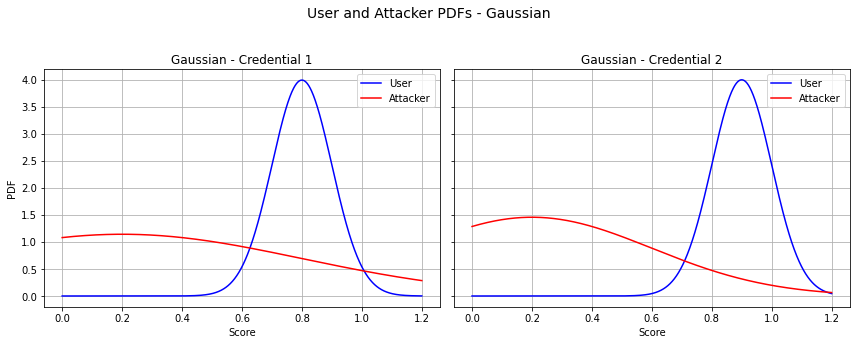

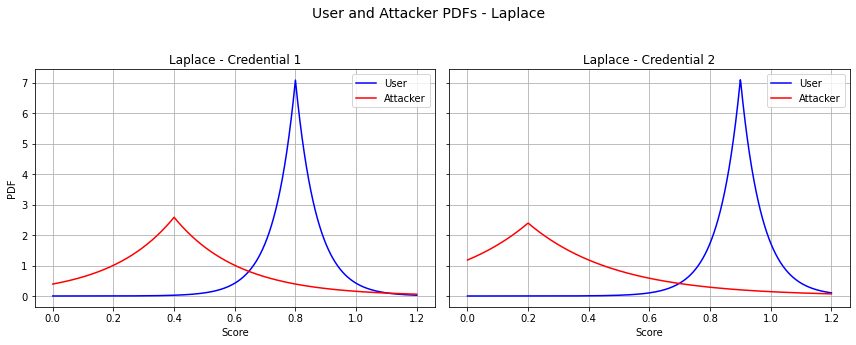

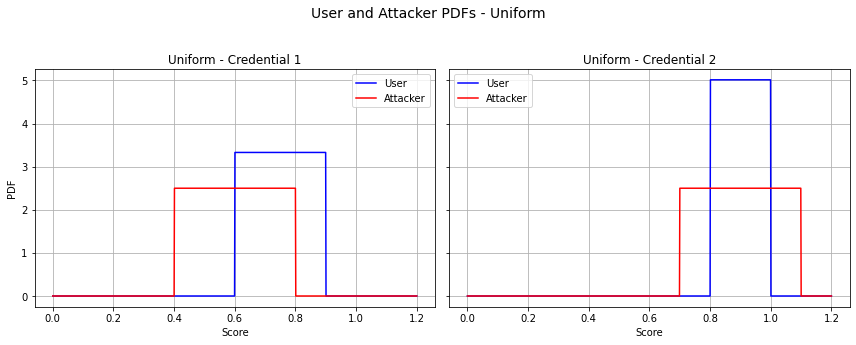

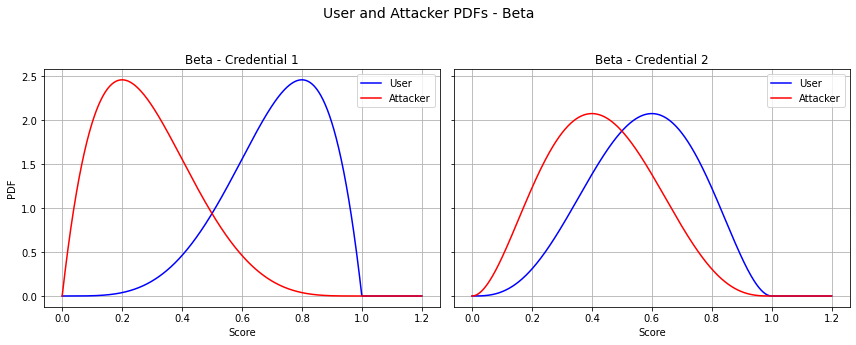

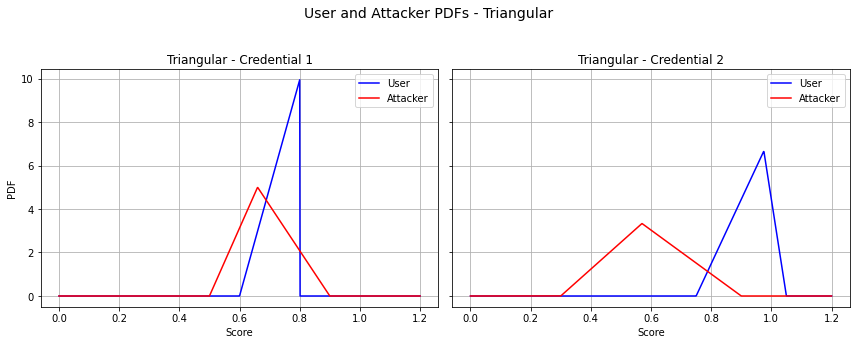

In [46]:
import pandas as pd
from scipy.stats import triang
from scipy.interpolate import interp1d

# Score axis
t = np.linspace(0, 1.2, 1000)

# Define different parameter sets for two credentials
params_cred1 = {
    "Gaussian": (
        norm.pdf(t, loc=0.8, scale=0.1),
        norm.pdf(t, loc=0.2, scale=0.6)
    ),
    "Laplace": (
        laplace.pdf(t, loc=0.8, scale=0.1 / np.sqrt(2)),
        laplace.pdf(t, loc=0.4, scale=0.3 / np.sqrt(2))
    ),
    "Uniform": (
        uniform.pdf(t, loc=0.6, scale=0.3),
        uniform.pdf(t, loc=0.4, scale=0.4)
    ),
    "Beta": (
        beta.pdf(t, a=5, b=2),
        beta.pdf(t, a=2, b=5)
    ),
    "Triangular": (
        triang.pdf(t, c=1, loc=0.6, scale=0.2),
        triang.pdf(t, c=0.4, loc=0.5, scale=0.4)
    )
}

params_cred2 = {
    "Gaussian": (
        norm.pdf(t, loc=0.9, scale=0.1),
        norm.pdf(t, loc=0.2, scale=0.4)
    ),
    "Laplace": (
        laplace.pdf(t, loc=0.9, scale=0.1 / np.sqrt(2)),
        laplace.pdf(t, loc=0.2, scale=0.4 / np.sqrt(2))
    ),
    "Uniform": (
        uniform.pdf(t, loc=0.8, scale=0.2),
        uniform.pdf(t, loc=0.7, scale=0.4)
    ),
    "Beta": (
        beta.pdf(t, a=4, b=3),
        beta.pdf(t, a=3, b=4)
    ),
    "Triangular": (
        triang.pdf(t, c=0.75, loc=0.75, scale=0.3),
        triang.pdf(t, c=0.45, loc=0.3, scale=0.6)
    )
}

# Plot side-by-side user/attacker PDFs for each distribution
for name in params_cred1:
    user1, attacker1 = params_cred1[name]
    user2, attacker2 = params_cred2[name]

    user1 /= np.trapz(user1, t)
    attacker1 /= np.trapz(attacker1, t)
    user2 /= np.trapz(user2, t)
    attacker2 /= np.trapz(attacker2, t)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Credential 1
    axs[0].plot(t, user1, label="User", color="blue")
    axs[0].plot(t, attacker1, label="Attacker", color="red")
    axs[0].set_title(f"{name} - Credential 1")
    axs[0].set_xlabel("Score")
    axs[0].set_ylabel("PDF")
    axs[0].legend()
    axs[0].grid(True)

    # Credential 2
    axs[1].plot(t, user2, label="User", color="blue")
    axs[1].plot(t, attacker2, label="Attacker", color="red")
    axs[1].set_title(f"{name} - Credential 2")
    axs[1].set_xlabel("Score")
    axs[1].legend()
    axs[1].grid(True)

    plt.suptitle(f"User and Attacker PDFs - {name}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [47]:
def find_optimal_point(params_cred1):
    cred_results = {}

    for name, (user_pdf, attacker_pdf) in params_cred1.items():
        # Normalize
        user_pdf /= np.trapz(user_pdf, t)
        attacker_pdf /= np.trapz(attacker_pdf, t)

        # Calculate FRR and FAR
        FRR = np.array([np.trapz(user_pdf[t < T], t[t < T]) for T in t])
        FAR = np.array([np.trapz(attacker_pdf[t >= T], t[t >= T]) for T in t])

        loss = FRR * (1 - FAR)
        leak = FAR * (1 - FRR)
        theft = FRR * FAR
        safe = 1 - loss - leak - theft

        # Find intersection between user and attacker PDFs
        diff = user_pdf - attacker_pdf
        crossings = np.where(np.diff(np.sign(diff)))[0]

        intersections = []
        for i in crossings:
            x0, x1 = t[i], t[i + 1]
            y0, y1 = diff[i], diff[i + 1]
            if y1 - y0 != 0:
                x_cross = x0 - y0 * (x1 - x0) / (y1 - y0)
                if((user_pdf[i] > 0) and (attacker_pdf[i] > 0)):
                    intersections.append(x_cross)
        
        intersection_success = 0
        if intersections:
            intersection_idx = np.argmin(np.abs(t - intersections[0]))
            intersection_success = safe[intersection_idx]
        
        best_idx = np.argmax(safe)
        max_success = safe[best_idx]

        cred_results[name] = {
            "name": name,
            "FRR": FRR,
            "FAR": FAR,
            "safe": safe,
            "loss": loss,
            "leak": leak,
            "best_idx": best_idx,
            "max_success": max_success,
            "threshold": t[best_idx],
            "intersection_success": intersection_success,
            "intersection_values": intersections
        }

    # Print header
    print(f"{'Name':<15} {'FRR':>10} {'FAR':>10} {'Safe':>10} {'Loss':>10} {'Leak':>10} {'Max Success':>14} {'Threshold':>10} {'Inter. Success':>16}")

    # Print data
    for name, vals in cred_results.items():
        idx = vals["best_idx"]
        print(f"{name:<15} {vals['FRR'][idx]:10.3f} {vals['FAR'][idx]:10.3f} {vals['safe'][idx]:10.3f} "
              f"{vals['loss'][idx]:10.3f} {vals['leak'][idx]:10.3f} {vals['max_success']*100:14.3f} "
              f"{vals['threshold']:10.3f} {vals['intersection_success']*100:10.3f}")

    return cred_results

In [48]:
cred_results1=find_optimal_point(params_cred1)

Name                   FRR        FAR       Safe       Loss       Leak    Max Success  Threshold   Inter. Success
Gaussian             0.059      0.311      0.648      0.041      0.293         64.807      0.645     64.561
Laplace              0.062      0.153      0.794      0.052      0.144         79.426      0.653     79.393
Uniform              0.166      0.374      0.522      0.104      0.312         52.219      0.651      0.000
Beta                 0.109      0.109      0.794      0.097      0.097         79.421      0.501     79.421
Triangular           0.262      0.401      0.442      0.157      0.296         44.231      0.704     43.262


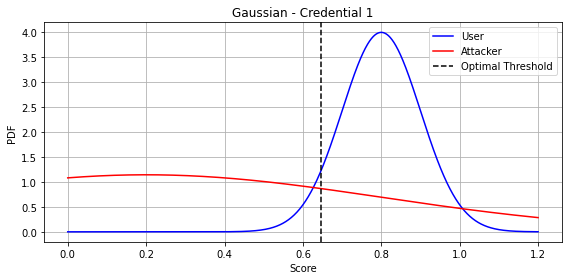

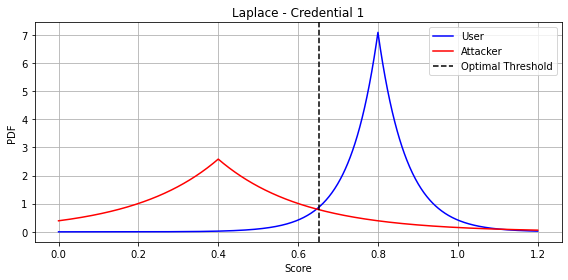

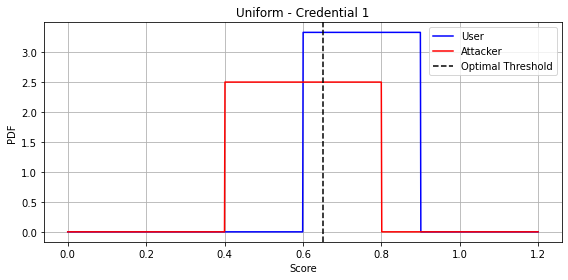

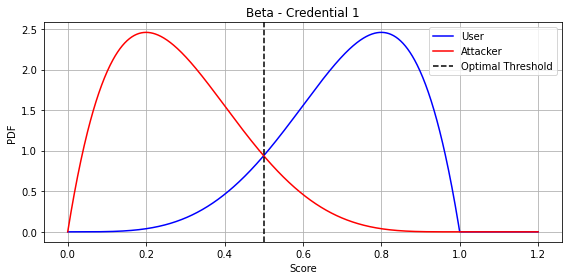

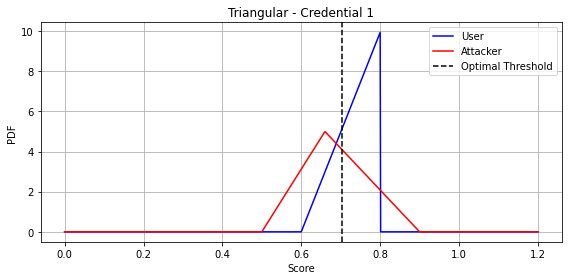

In [49]:
for name, vals in cred_results1.items():
    user1, attacker1 = params_cred1[name]

    user1 /= np.trapz(user1, t)
    attacker1 /= np.trapz(attacker1, t)

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(t, user1, label="User", color="blue")
    ax.plot(t, attacker1, label="Attacker", color="red")
    ax.axvline(vals['threshold'], color='black', linestyle='--', label='Optimal Threshold')
    
    ax.set_title(f"{name} - Credential 1")
    ax.set_xlabel("Score")
    ax.set_ylabel("PDF")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

In [39]:
cred_results2=find_optimal_point(params_cred2)

Name                   FRR        FAR       Safe       Loss       Leak    Max Success  Threshold   Inter. Success
Gaussian             0.032      0.135      0.838      0.028      0.130         83.754      0.716     83.724
Laplace              0.030      0.095      0.878      0.028      0.092         87.777      0.703     87.768
Uniform              0.244      0.623      0.285      0.092      0.471         28.493      0.850      0.227
Beta                 0.343      0.342      0.432      0.226      0.225         43.214      0.501     43.214
Triangular           0.023      0.061      0.918      0.021      0.059         91.794      0.790     91.785


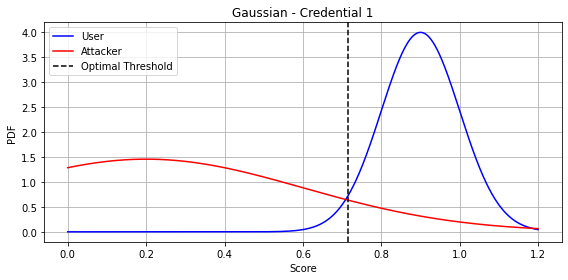

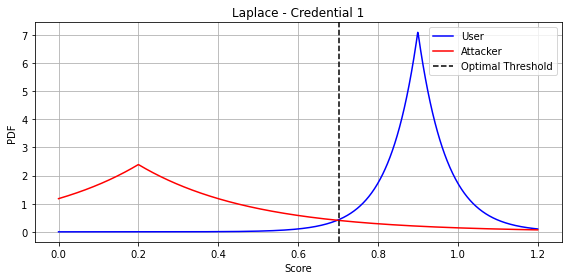

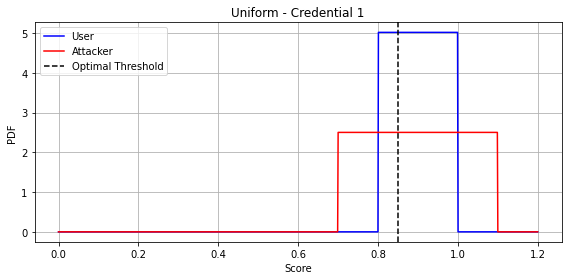

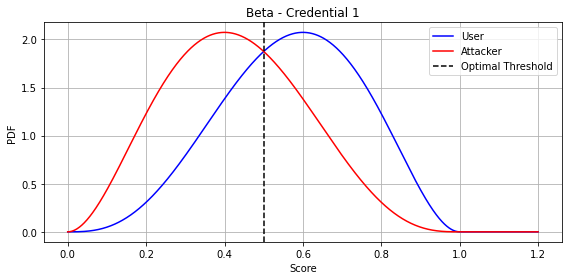

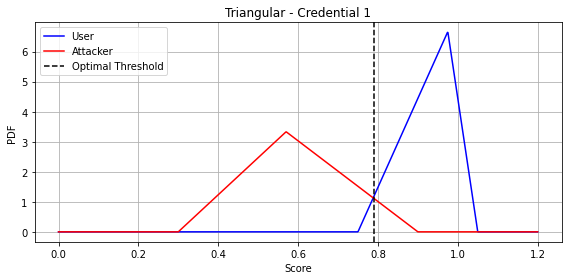

In [42]:
for name, vals in cred_results2.items():
    user1, attacker1 = params_cred2[name]

    user1 /= np.trapz(user1, t)
    attacker1 /= np.trapz(attacker1, t)

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(t, user1, label="User", color="blue")
    ax.plot(t, attacker1, label="Attacker", color="red")
    ax.axvline(vals['threshold'], color='black', linestyle='--', label='Optimal Threshold')
    
    ax.set_title(f"{name} - Credential 1")
    ax.set_xlabel("Score")
    ax.set_ylabel("PDF")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

In [43]:
# Evaluate combined wallet success at standalone safe thresholds
def find_success_based_on_cred_optimal_point_same_pdf(cred_results1,cred_results2):
    results = []

    for name in cred_results1:
        i = cred_results1[name]["best_idx"]
        j = cred_results2[name]["best_idx"]

        s1, s2 = cred_results1[name]["safe"][i], cred_results2[name]["safe"][j]
        l1, l2 = cred_results1[name]["loss"][i], cred_results2[name]["loss"][j]
        k1, k2 = cred_results1[name]["leak"][i], cred_results2[name]["leak"][j]

        far1, frr1 = cred_results1[name]["FAR"][i], cred_results1[name]["FRR"][i]
        far2, frr2 = cred_results2[name]["FAR"][j], cred_results2[name]["FRR"][j]

        wallet1_success = s1 * s2 + s1 * l2 + s2 * l1
        wallet2_success = s1 * s2 + s1 * k2 + s2 * k1

        results.append((f"{name} + {name}", wallet1_success * 100, wallet2_success * 100,
                        t[i], t[j], far1, frr1, far2, frr2))

    # Print results
    print("Evaluation of 2 wallets based on each one optimal point")
    print(f"{'Pair':<25} {'Wallet1 (%)':>12} {'Wallet2 (%)':>12} {'T1':>8} {'T2':>8} {'FAR1':>8} {'FRR1':>8} {'FAR2':>8} {'FRR2':>8}")
    for name, w1, w2, T1, T2, far1, frr1, far2, frr2 in results:
        print(f"{name:<25} {w1:12.2f} {w2:12.2f} {T1:8.3f} {T2:8.3f} {far1:8.3f} {frr1:8.3f} {far2:8.3f} {frr2:8.3f}")
        
    return results

In [44]:
# Evaluate wallet success
results = find_success_based_on_cred_optimal_point_same_pdf(cred_results1,cred_results2)

Evaluation of 2 wallets based on each one optimal point
Pair                       Wallet1 (%)  Wallet2 (%)       T1       T2     FAR1     FRR1     FAR2     FRR2
Gaussian + Gaussian              67.29        87.95    0.649    0.716    0.221    0.064    0.135    0.032
Laplace + Laplace                76.51        89.63    0.653    0.703    0.153    0.062    0.095    0.030
Uniform + Uniform                22.64        48.36    0.651    0.850    0.374    0.166    0.623    0.244
Beta + Beta                      56.46        56.34    0.501    0.501    0.109    0.109    0.342    0.343
Triangular + Triangular          55.97        70.36    0.704    0.790    0.401    0.262    0.061    0.023


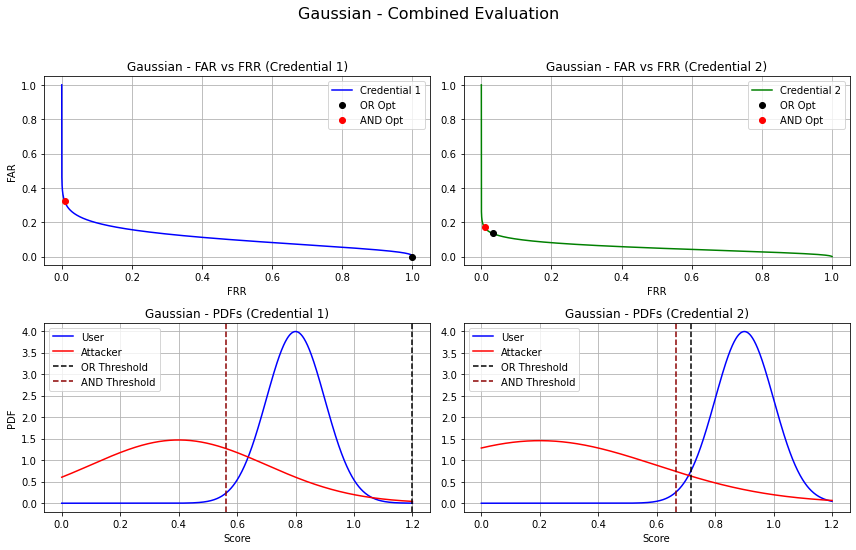

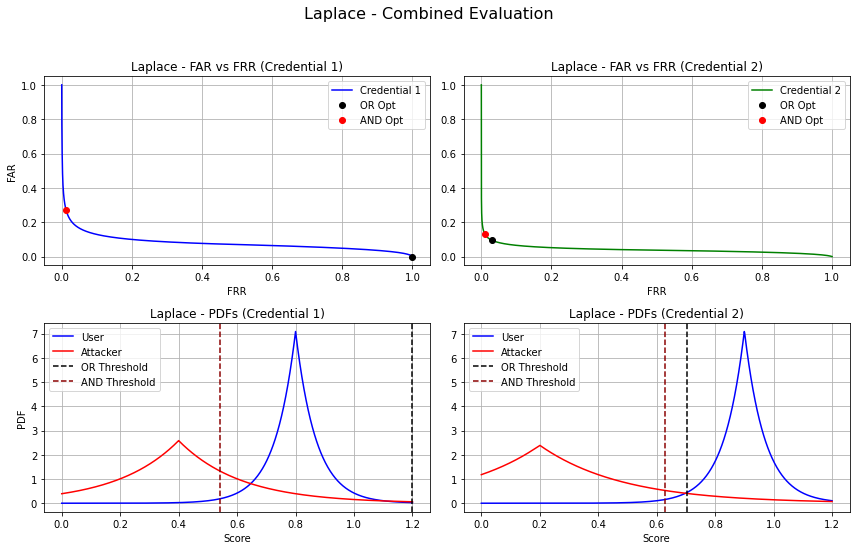

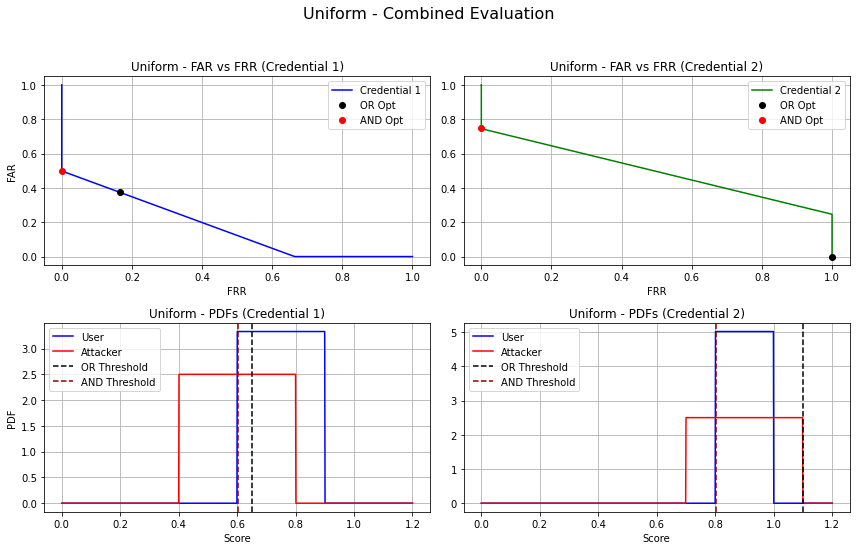

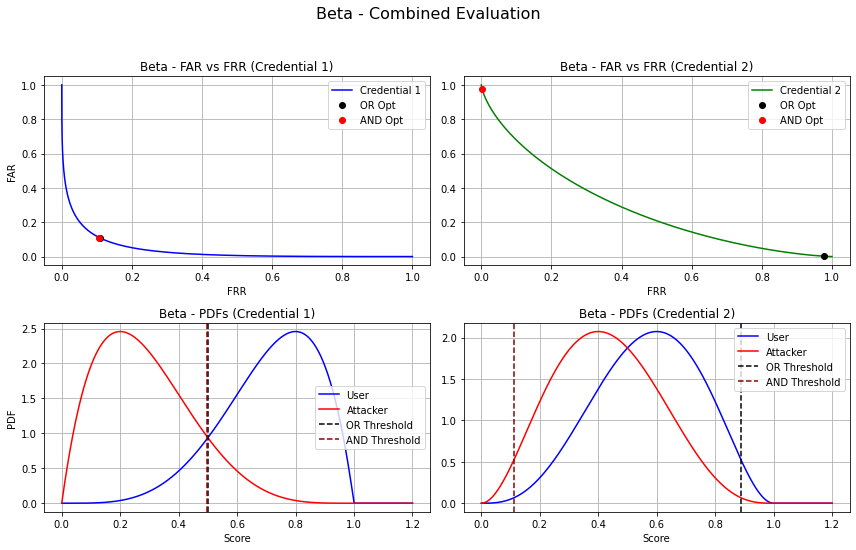

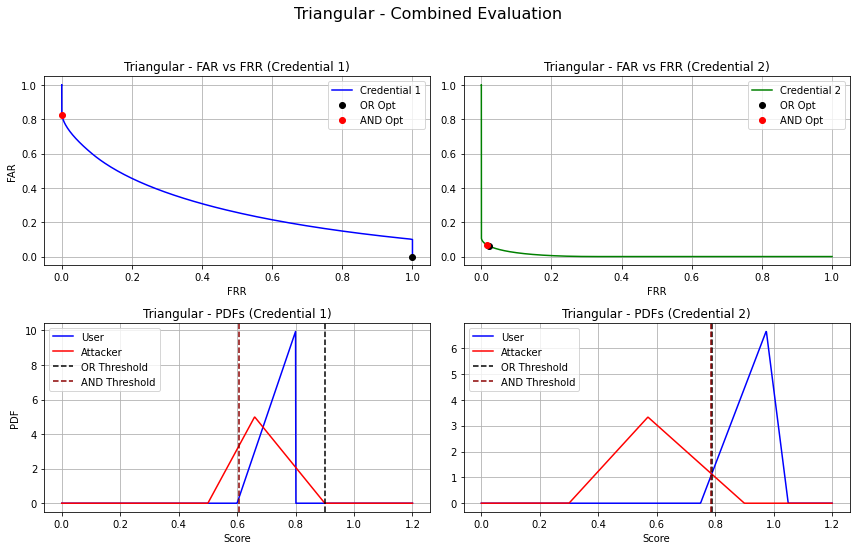


=== OR Wallet Results ===
      Pair  Success (%)       T1       T2     FAR1     FRR1     FAR2     FRR2
  Gaussian    83.754457 1.200000 0.715916 0.000000 0.999998 0.134771 0.031997
   Laplace    87.777457 1.200000 0.702703 0.000000 0.999970 0.094701 0.030405
   Uniform    52.218919 0.651051 1.100300 0.373874 0.166000 0.000000 1.000000
      Beta    79.483221 0.502102 0.888889 0.107418 0.110222 0.001899 0.978202
Triangular    91.794375 0.900901 0.790390 0.000000 1.000000 0.060680 0.022758

=== AND Wallet Results ===
      Pair  Success (%)       T1       T2     FAR1     FRR1     FAR2     FRR2
  Gaussian    92.901125 0.560961 0.665465 0.322627 0.008145 0.169384 0.009216
   Laplace    94.293081 0.540541 0.627027 0.269844 0.012548 0.129801 0.010426
   Uniform    62.785962 0.601802 0.801201 0.496997 0.002000 0.746246 0.000000
      Beta    79.483206 0.498498 0.112913 0.110790 0.106862 0.977882 0.001938
Triangular    92.838485 0.605405 0.784384 0.826397 0.000448 0.067511 0.016318


In [45]:
# Store results
results_or, results_and = [], []

# Evaluate each distribution type
for name in params_cred1:
    user_pdf1, attacker_pdf1 = params_cred1[name]
    user_pdf2, attacker_pdf2 = params_cred2[name]

    user_pdf1 /= np.trapz(user_pdf1, t)
    attacker_pdf1 /= np.trapz(attacker_pdf1, t)
    user_pdf2 /= np.trapz(user_pdf2, t)
    attacker_pdf2 /= np.trapz(attacker_pdf2, t)

    FRR1 = np.array([np.trapz(user_pdf1[t < T], t[t < T]) for T in t])
    FAR1 = np.array([np.trapz(attacker_pdf1[t >= T], t[t >= T]) for T in t])
    loss1 = FRR1 * (1 - FAR1)
    leak1 = FAR1 * (1 - FRR1)
    safe1 = 1 - loss1 - leak1 - FRR1 * FAR1

    FRR2 = np.array([np.trapz(user_pdf2[t < T], t[t < T]) for T in t])
    FAR2 = np.array([np.trapz(attacker_pdf2[t >= T], t[t >= T]) for T in t])
    loss2 = FRR2 * (1 - FAR2)
    leak2 = FAR2 * (1 - FRR2)
    safe2 = 1 - loss2 - leak2 - FRR2 * FAR2

    OR_wallet = np.zeros((len(t), len(t)))
    AND_wallet = np.zeros((len(t), len(t)))

    for i in range(len(t)):
        for j in range(len(t)):
            OR_wallet[i, j] = safe1[i] * safe2[j] + safe1[i] * loss2[j] + safe2[j] * loss1[i]
            AND_wallet[i, j] = safe1[i] * safe2[j] + safe1[i] * leak2[j] + safe2[j] * leak1[i]

    i_or, j_or = np.unravel_index(np.argmax(OR_wallet), OR_wallet.shape)
    i_and, j_and = np.unravel_index(np.argmax(AND_wallet), AND_wallet.shape)

    results_or.append({
        "Pair": name,
        "Success (%)": OR_wallet[i_or, j_or] * 100,
        "T1": t[i_or], "T2": t[j_or],
        "FAR1": FAR1[i_or], "FRR1": FRR1[i_or],
        "FAR2": FAR2[j_or], "FRR2": FRR2[j_or]
    })

    results_and.append({
        "Pair": name,
        "Success (%)": AND_wallet[i_and, j_and] * 100,
        "T1": t[i_and], "T2": t[j_and],
        "FAR1": FAR1[i_and], "FRR1": FRR1[i_and],
        "FAR2": FAR2[j_and], "FRR2": FRR2[j_and]
    })

    # Create combined 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=False)

    # FAR vs FRR: Credential 1
    axs[0][0].plot(FRR1, FAR1, label="Credential 1", color="blue")
    axs[0][0].plot(FRR1[i_or], FAR1[i_or], 'ko', label="OR Opt")
    axs[0][0].plot(FRR1[i_and], FAR1[i_and], 'ro', label="AND Opt")
    axs[0][0].set_title(f"{name} - FAR vs FRR (Credential 1)")
    axs[0][0].set_xlabel("FRR")
    axs[0][0].set_ylabel("FAR")
    axs[0][0].legend()
    axs[0][0].grid(True)

    # FAR vs FRR: Credential 2
    axs[0][1].plot(FRR2, FAR2, label="Credential 2", color="green")
    axs[0][1].plot(FRR2[j_or], FAR2[j_or], 'ko', label="OR Opt")
    axs[0][1].plot(FRR2[j_and], FAR2[j_and], 'ro', label="AND Opt")
    axs[0][1].set_title(f"{name} - FAR vs FRR (Credential 2)")
    axs[0][1].set_xlabel("FRR")
    axs[0][1].legend()
    axs[0][1].grid(True)

    # PDF plot: Credential 1
    axs[1][0].plot(t, user_pdf1, label="User", color="blue")
    axs[1][0].plot(t, attacker_pdf1, label="Attacker", color="red")
    axs[1][0].axvline(t[i_or], color='black', linestyle='--', label='OR Threshold')
    axs[1][0].axvline(t[i_and], color='darkred', linestyle='--', label='AND Threshold')
    axs[1][0].set_title(f"{name} - PDFs (Credential 1)")
    axs[1][0].set_xlabel("Score")
    axs[1][0].set_ylabel("PDF")
    axs[1][0].legend()
    axs[1][0].grid(True)

    # PDF plot: Credential 2
    axs[1][1].plot(t, user_pdf2, label="User", color="blue")
    axs[1][1].plot(t, attacker_pdf2, label="Attacker", color="red")
    axs[1][1].axvline(t[j_or], color='black', linestyle='--', label='OR Threshold')
    axs[1][1].axvline(t[j_and], color='darkred', linestyle='--', label='AND Threshold')
    axs[1][1].set_title(f"{name} - PDFs (Credential 2)")
    axs[1][1].set_xlabel("Score")
    axs[1][1].legend()
    axs[1][1].grid(True)

    plt.suptitle(f"{name} - Combined Evaluation", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Display tables
df_or = pd.DataFrame(results_or)
df_and = pd.DataFrame(results_and)

print("\n=== OR Wallet Results ===")
print(df_or.to_string(index=False))
print("\n=== AND Wallet Results ===")
print(df_and.to_string(index=False))
